In [2]:
from dim_reduce import *

### Dimensionality Reduction Results: 

#### Pure LDA sepration

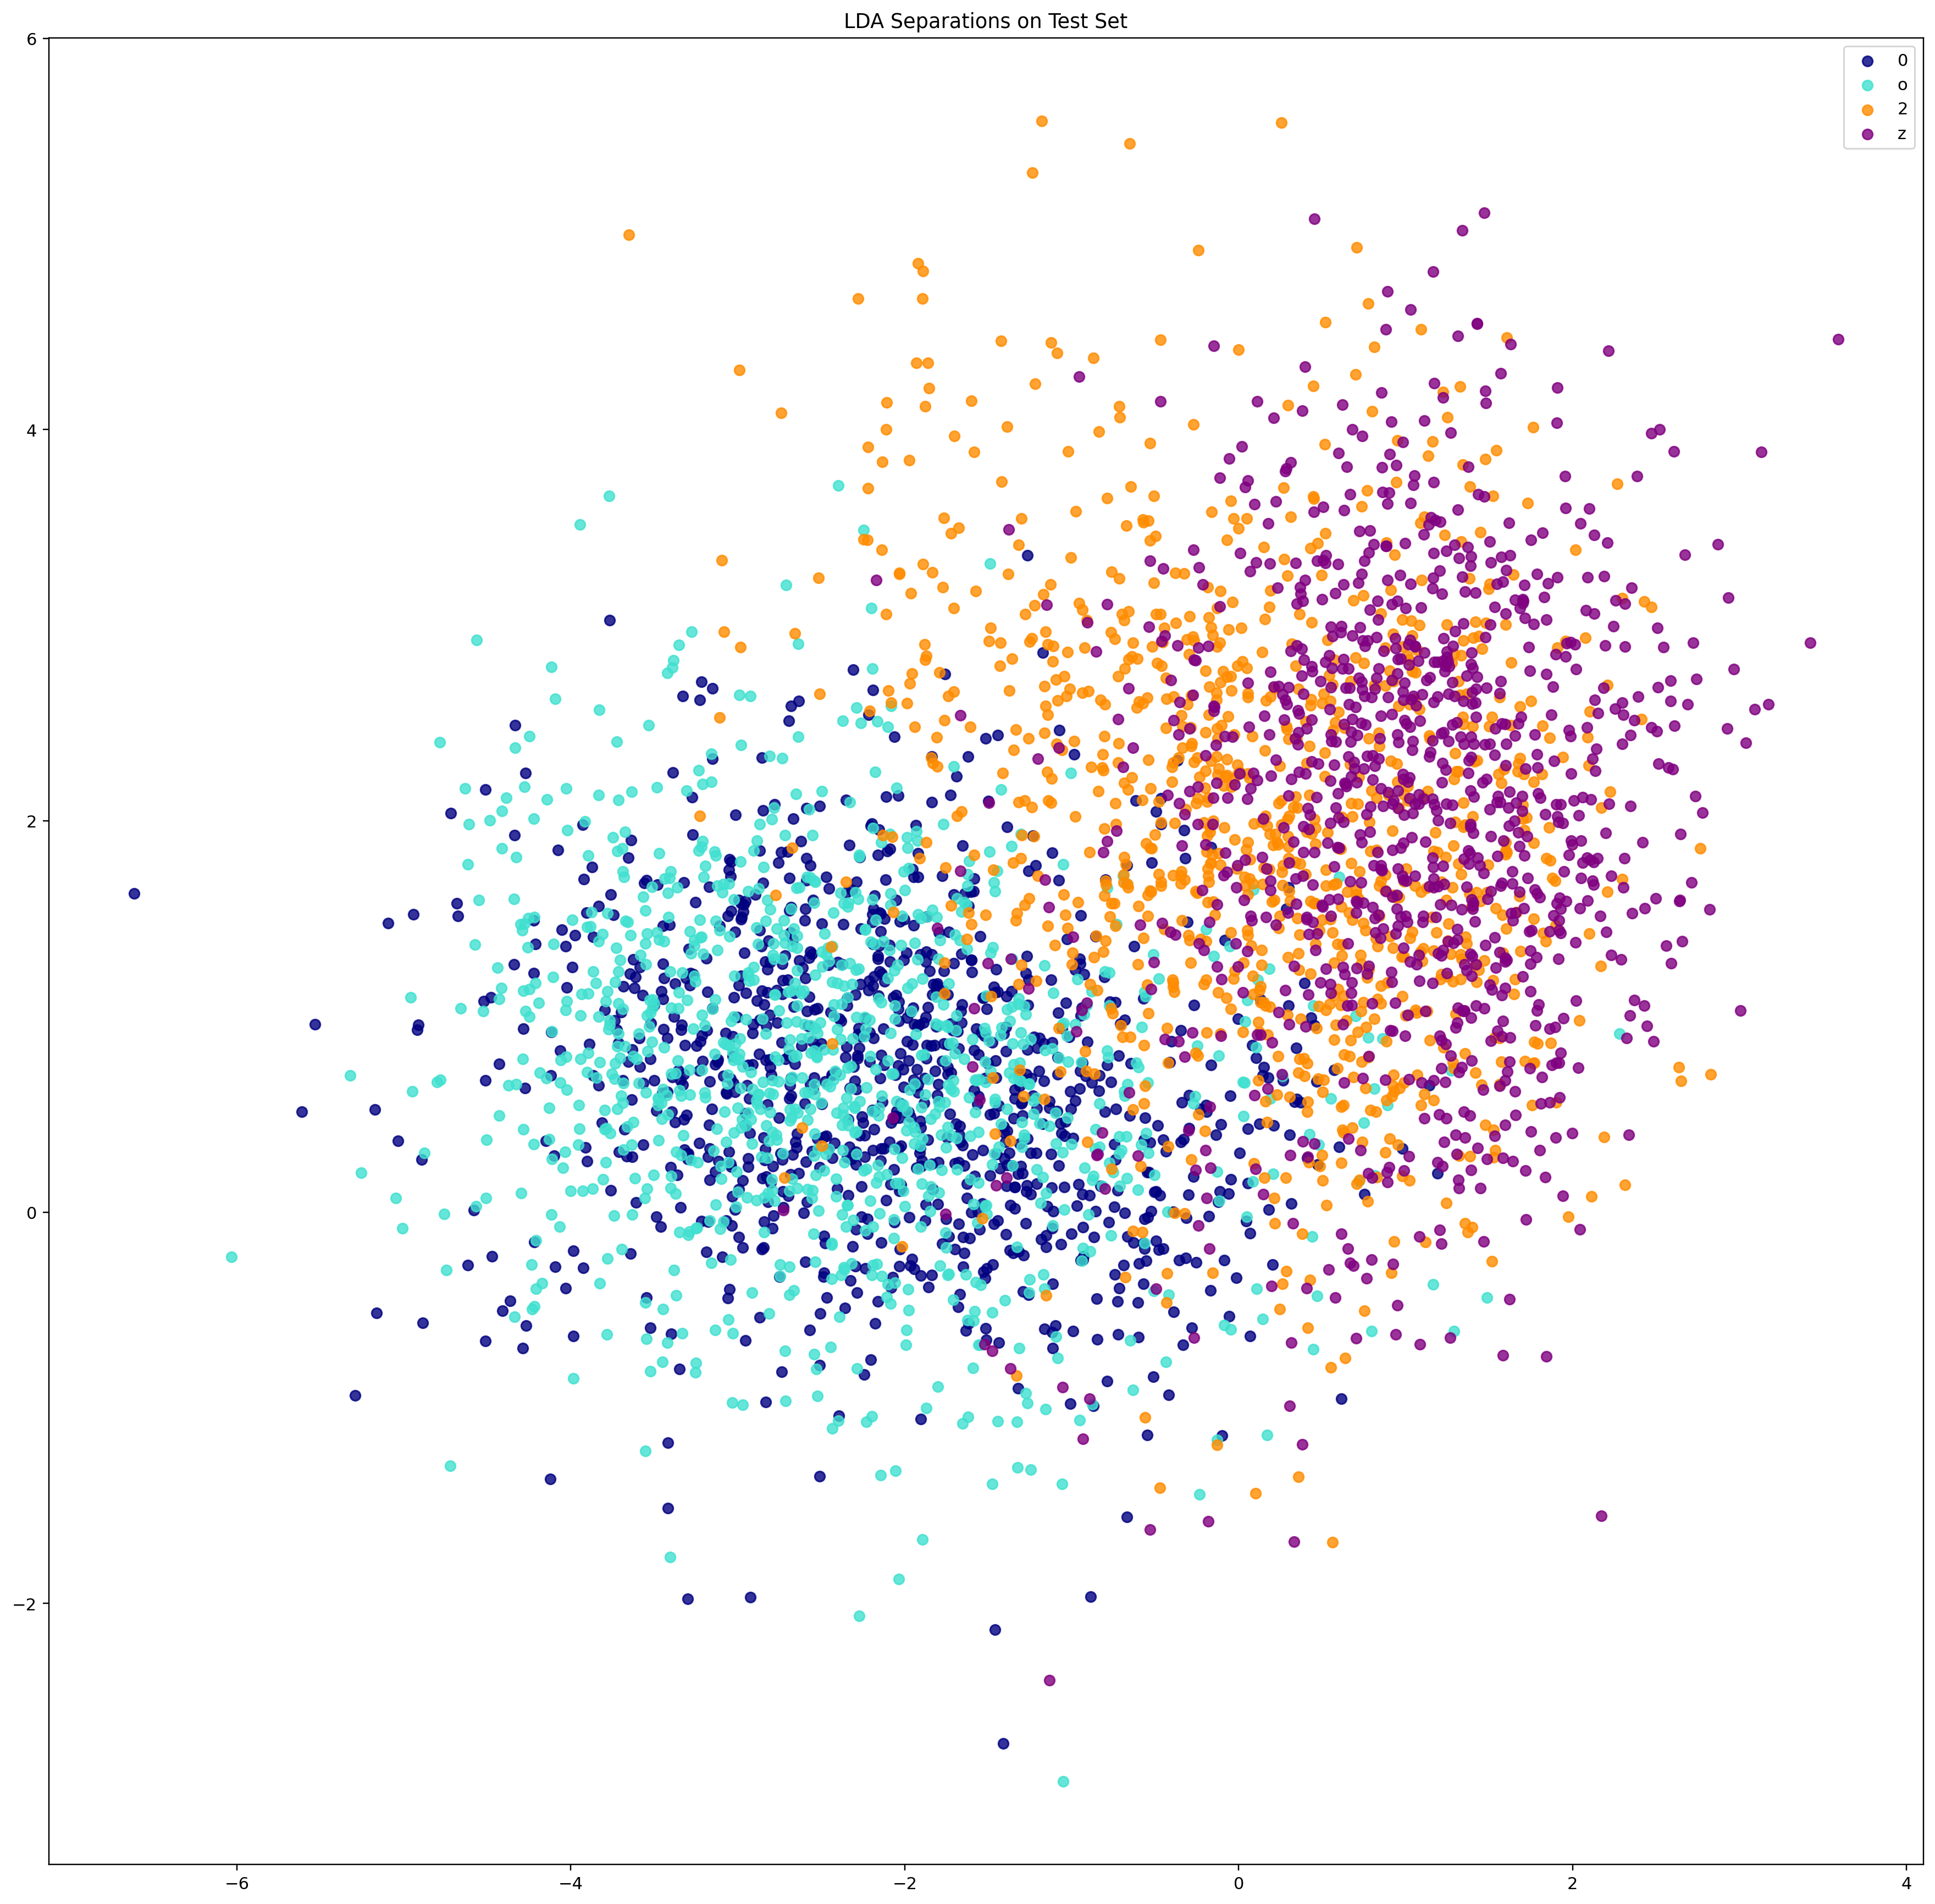

Demonstration ended. 


In [3]:
Symbols = "0o2z"
classes = [SymbolsToLabels(Sym) for Sym in Symbols]
LdaInstance = LDADimReduce()
Data, Labels = SplitbyClasses(classSize=1000, classes=classes)
# new data that never seemed before.
Embeddings = LdaInstance.getEmbeddings(Data);
colors = ['navy', 'turquoise', 'darkorange', "purple"]
SeparatingModes = [0, 5]
for color, II in zip(colors, classes):
    scatter(
        Embeddings[Labels == II, SeparatingModes[0]],
        Embeddings[Labels == II, SeparatingModes[1]],
        alpha=.8,
        color=color
    )
legend(list(Symbols))
title("LDA Separations on Test Set")
show()
print("Demonstration ended. ")

#### Pure PCA Separation


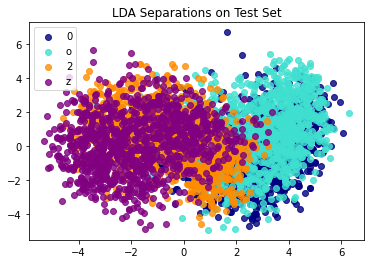

Demonstration ended. 


In [3]:
Symbols = "0o2z"
classes = [SymbolsToLabels(Sym) for Sym in Symbols]
LdaInstance = PCADimReduce()
Data, Labels = SplitbyClasses(classSize=1000, classes=classes)
# new data that never seemed before.
Embeddings = LdaInstance.getEmbeddings(Data);
colors = ['navy', 'turquoise', 'darkorange', "purple"]
SeparatingModes = [0, 5]
for color, II in zip(colors, classes):
    scatter(
        Embeddings[Labels == II, SeparatingModes[0]],
        Embeddings[Labels == II, SeparatingModes[1]],
        alpha=.8,
        color=color
    )
legend(list(Symbols))
title("LDA Separations on Test Set")
show()
print("Demonstration ended. ")

#### PCA + LDA Separations

In [ ]:
PCAInstance = PCADimReduce(n_components=0.8); print("Getting PCA Model...")
PCAEmbeddings = PCAInstance.getEmbeddings(); print("Getting PCA Embeddings...")
TrainLabels = PCAInstance.Labels
print("Train LDA on PCA Embeddings... ")
LDAMaxComponents = min(61, PCAInstance.PcaModel.n_components_ - 1)
LDAInstance = LDADimReduce(n_components=LDAMaxComponents,  # Just to be sure.
                           X=PCAEmbeddings,
                           y=TrainLabels)  # Use the PCA embeddings to train LDA

classes = [SymbolsToLabels(Char) for Char in "0o2z"]
TestData, TestLabels = SplitbyClasses(classSize=1000, classes=classes)
# Ge the LDA embeddings of the PCA embeddings.
print("Represent using PCA modes and then on LDA basis... ")
Embeddings = LDAInstance.getEmbeddings(PCAInstance.getEmbeddings(TestData))
colors = ['navy', 'turquoise', 'darkorange', "purple"]

## Plotting the Results
SeparatingModes = [0, 1]
for color, II in zip(colors, classes):
    scatter(
        Embeddings[TestLabels == II, SeparatingModes[0]],
        Embeddings[TestLabels == II, SeparatingModes[1]],
        alpha=.8,
        color=color
    )
legend(list("0o2z"))
title("PCA + LDA on Test data set")
show()

### SVM
* SVM trained on 26 letters
* SVM trained on all equally sampled 62 symbols 
* SVM trained on the hardest to 2 symbols

Setup the SVM, plitting the training set and the test sets and get their LDA embeddings.

Modeling Has been fitted: 
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])


<Figure size 2200x2200 with 0 Axes>

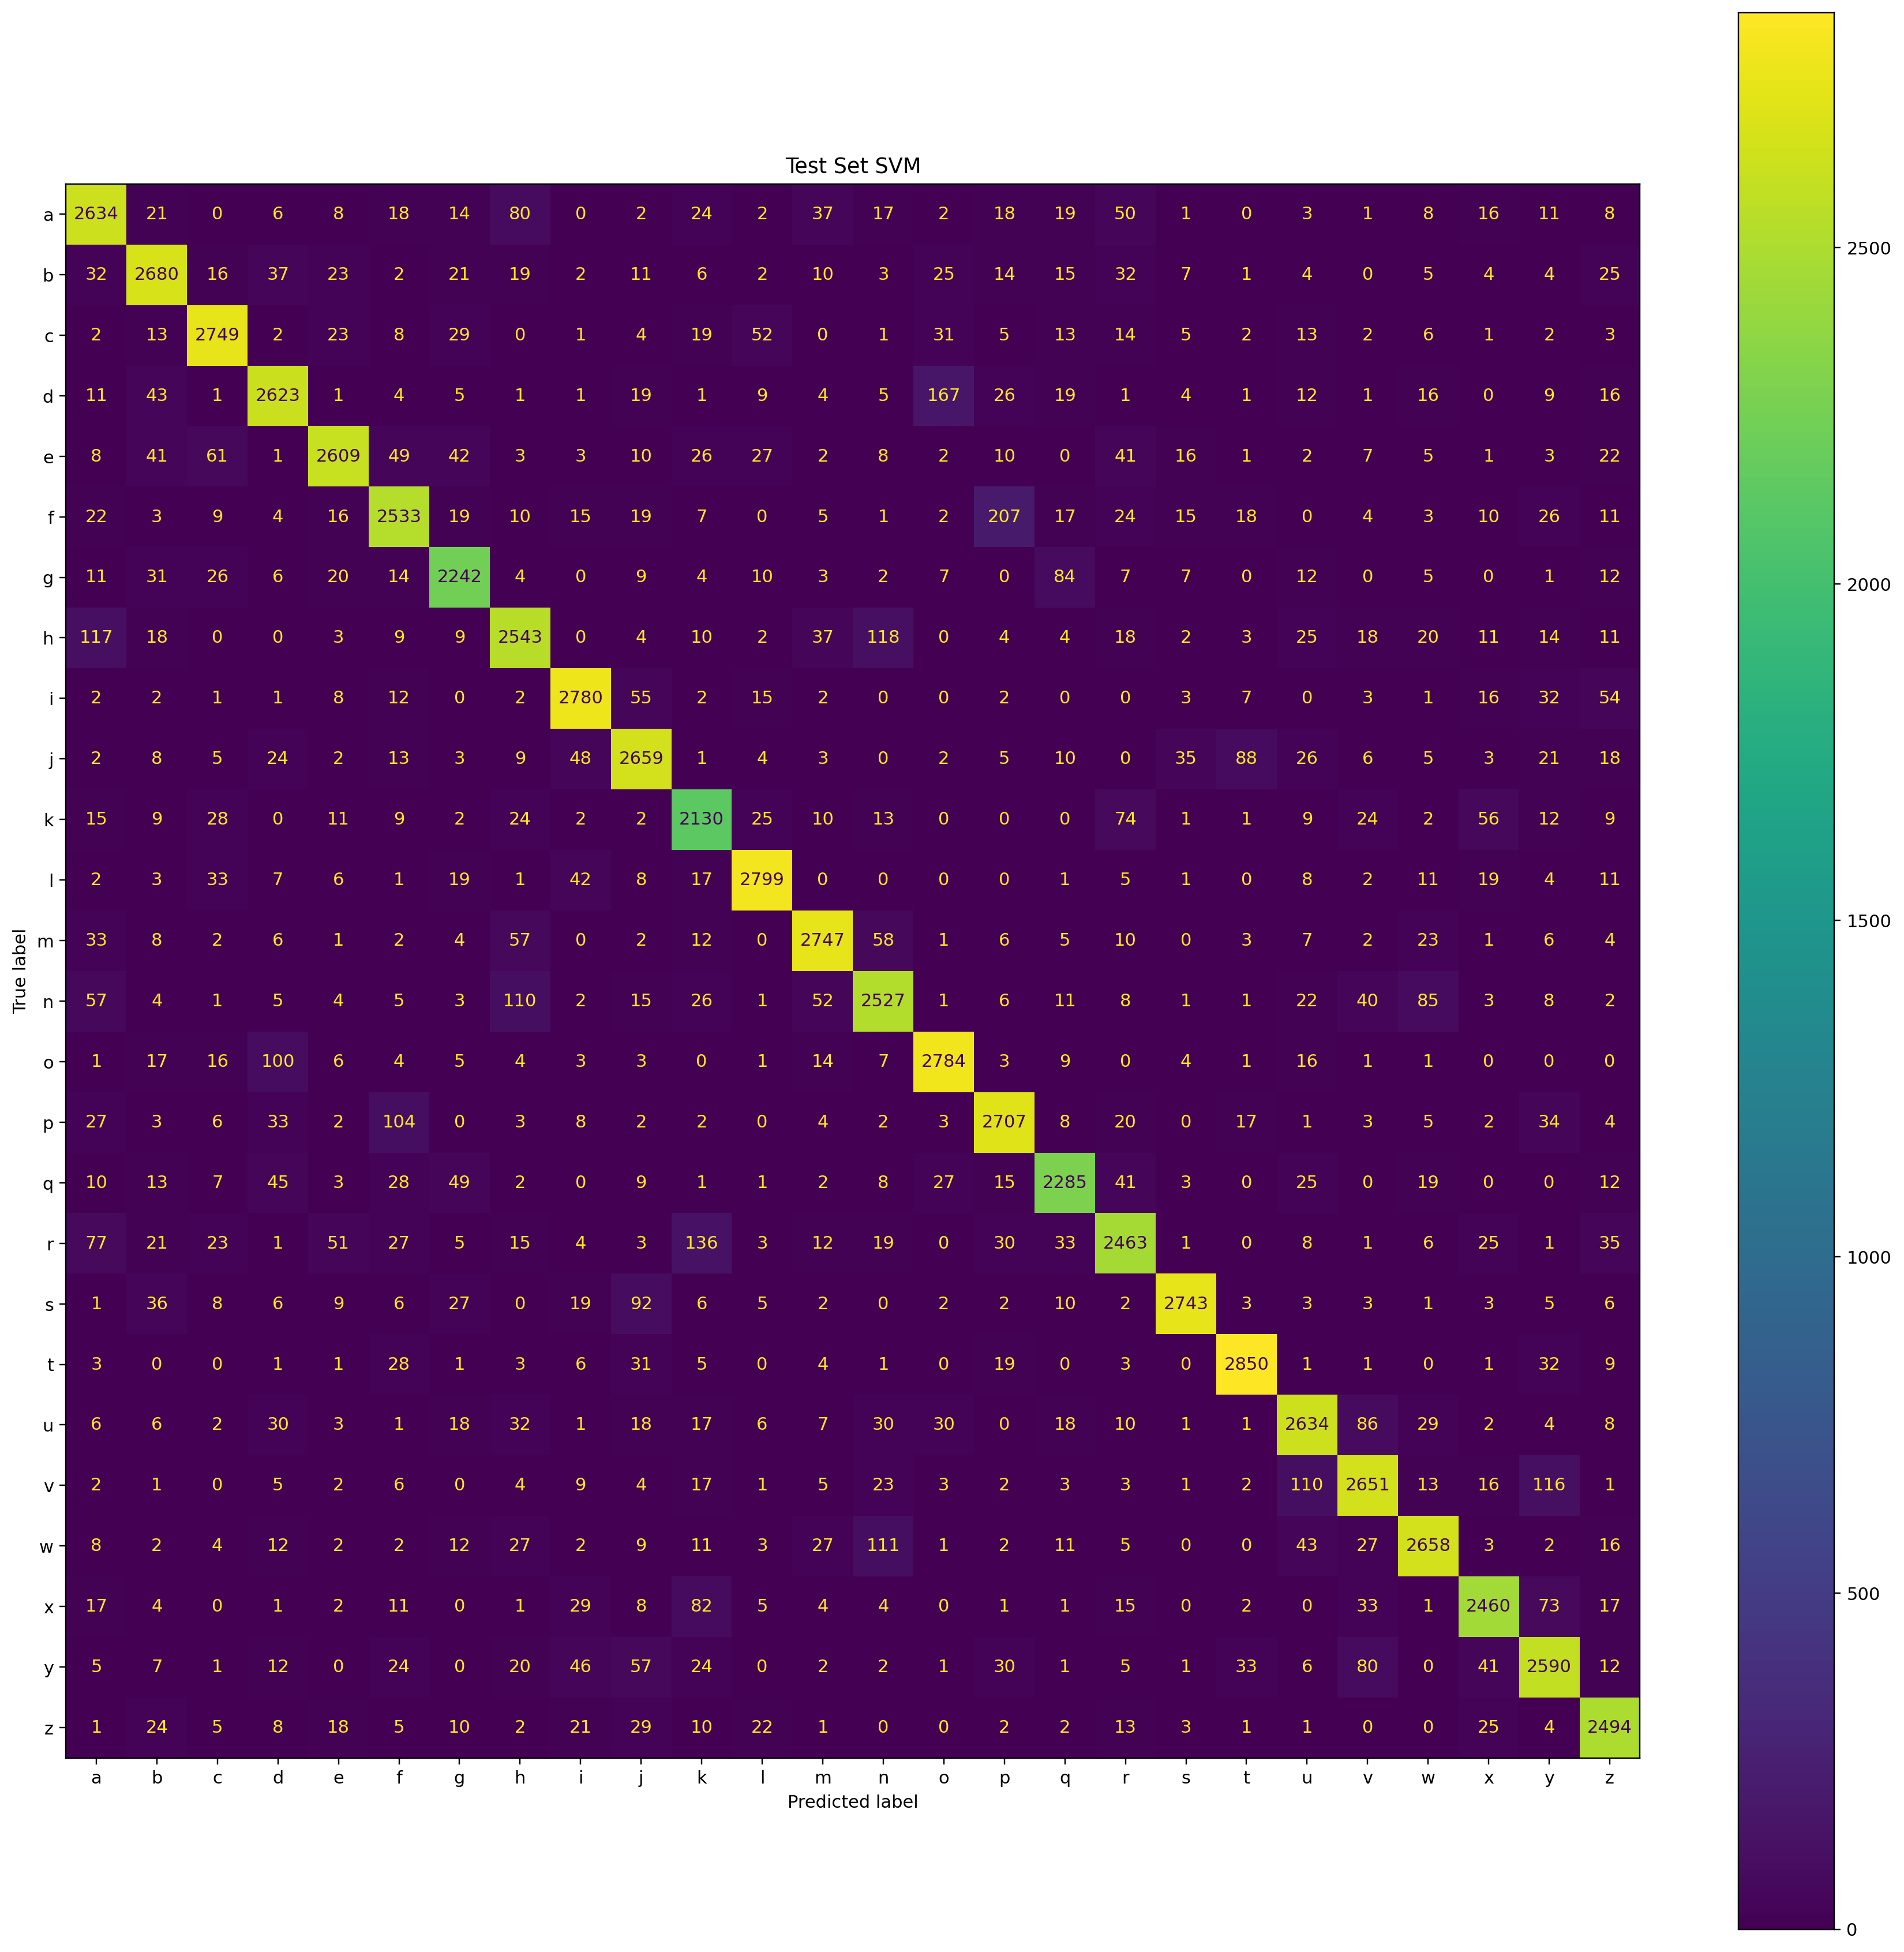

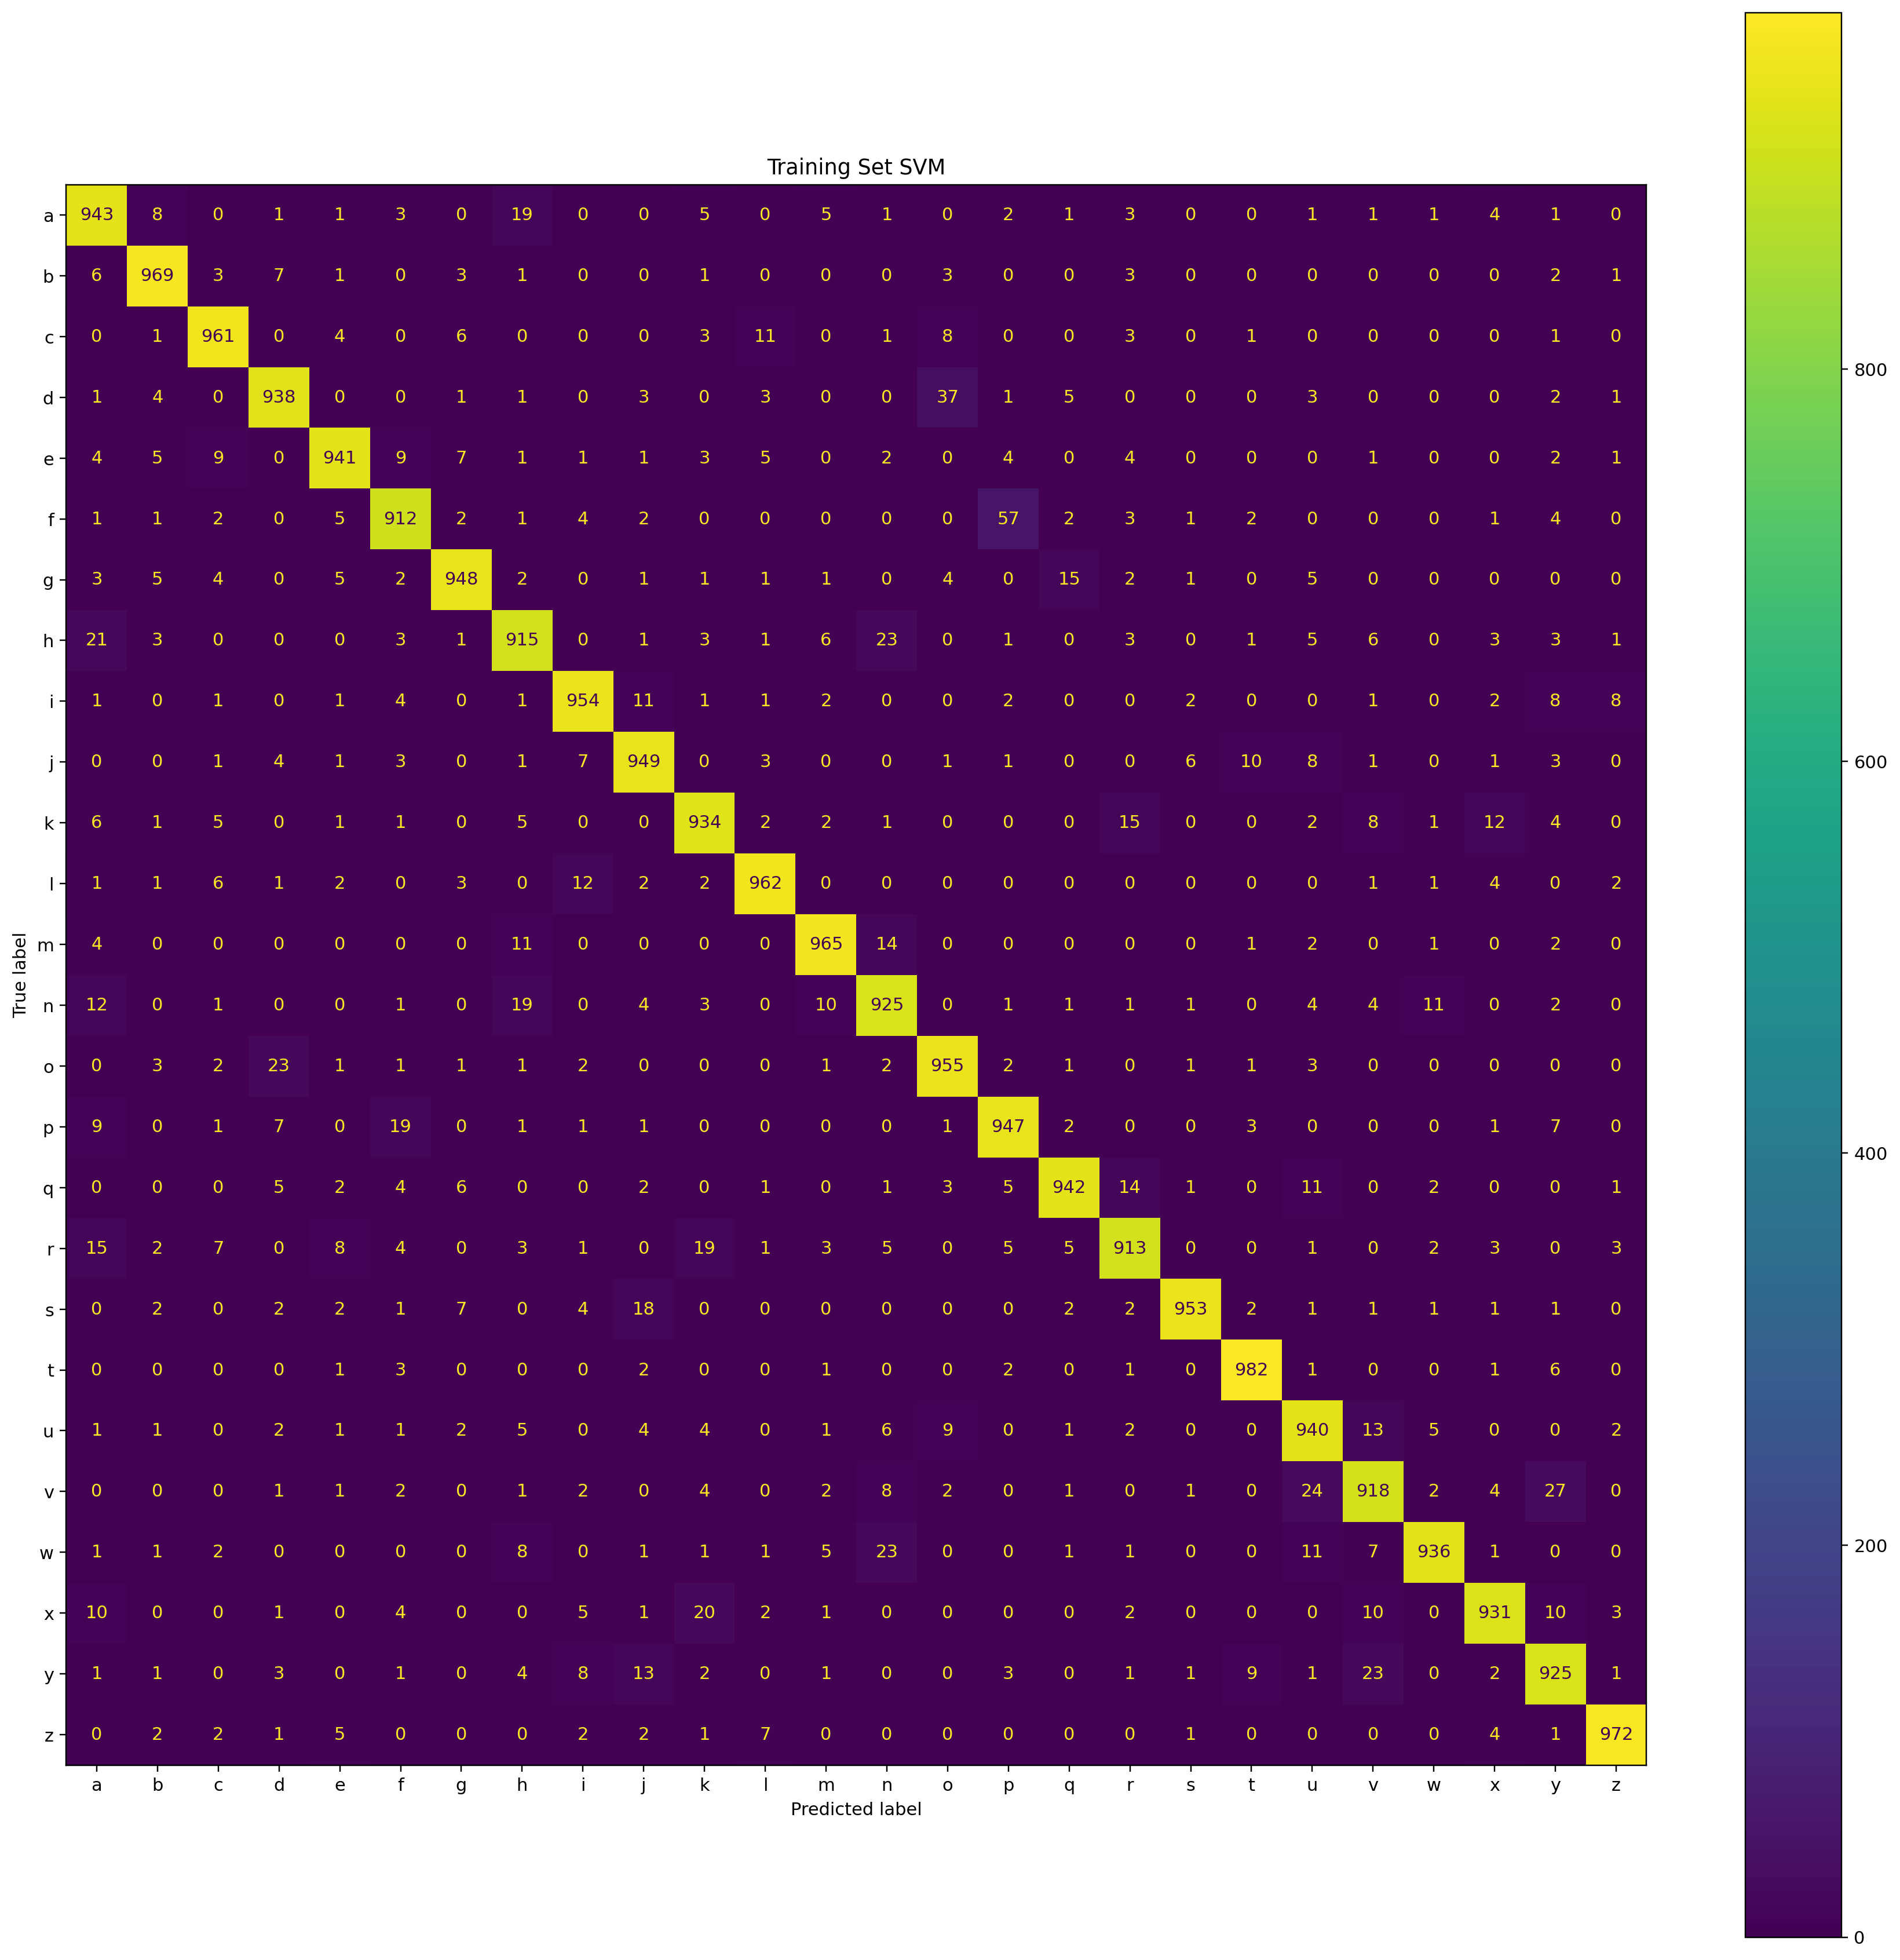

In [5]:
DisplayLabels = "abcdefghijklmnopqrstuvwxyz"
classes = [SymbolsToLabels(II) for II in DisplayLabels]
Model = make_pipeline(StandardScaler(), SVC(gamma="auto"))  # Making the SVC Model.

TrainX, TrainY = SplitbyClasses(classes=classes, classSize=1000)
TestX, TestY = SplitbyClasses(classes=classes, classSize=3000)

DimRe = LDADimReduce(X=TrainX, y=TrainY)  # Use Train set to create LDA embeddings.
TrainEmbeddings = DimRe.getEmbeddings()  # Get Embeddings from the set trained LDA
TestEmbeddings = DimRe.getEmbeddings(TestX) # Get the embeddings from the test set.

Model.fit(TrainEmbeddings, TrainY); print(f"Modeling Has been fitted: ")
print(Model)


In [ ]:
disp = plot_confusion_matrix(Model, TestEmbeddings, TestY, display_labels=list(DisplayLabels))
disp.ax_.set_title("Test Set SVM")
show()

In [ ]:
disp = plot_confusion_matrix(Model, TrainEmbeddings, TrainY, display_labels=list(DisplayLabels))
disp.ax_.set_title("Training Set SVM")
show()

### Decision Tree